In [25]:
_ = !pip install peft
_ = !pip install missingno


In [26]:
import pandas as pd
import missingno as msno
from transformers import AutoTokenizer, AutoModelForTokenClassification

### Importing the Dataset 

In [27]:
df = pd.read_csv('NOTEEVENTS_SocialHistory.csv')
df

,row_id,subject_id,hadm_id,chartdate,charttime,storetime,category,description,cgid,iserror,text
0,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
2,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
3,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
4,179,53181,170490.0,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] D...
...,...,...,...,...,...,...,...,...,...,...,...
61529,587658,69380,124616.0,2189-07-16,2189-07-16 20:30:00,2189-07-16 22:52:55,Physician,Physician Resident Admission Note,21375.0,NaN,"Chief Complaint: Shortness of breath, increas..."
61530,632634,53464,137299.0,2173-03-31,2173-03-31 07:58:00,2173-03-31 07:58:50,Physician,Physician Resident Admission Note,15146.0,NaN,TITLE:\n Chief Complaint: GI bleed\n HPI:...
61531,661393,97927,164455.0,2130-02-07,2130-02-07 11:33:00,2130-02-07 11:51:38,Physician,Physician Resident Admission Note,20732.0,NaN,Chief Complaint: severe sepsis\n HPI:\n H...
61532,661403,60106,136013.0,2145-02-02,2145-02-02 13:29:00,2145-02-02 13:29:52,Physician,Physician Resident Admission Note,19862.0,NaN,Chief Complaint: Trach Bleed\n HPI:\n Bri...


In [28]:
checkpoint = "obi/deid_bert_i2b2"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForTokenClassification.from_pretrained(checkpoint)

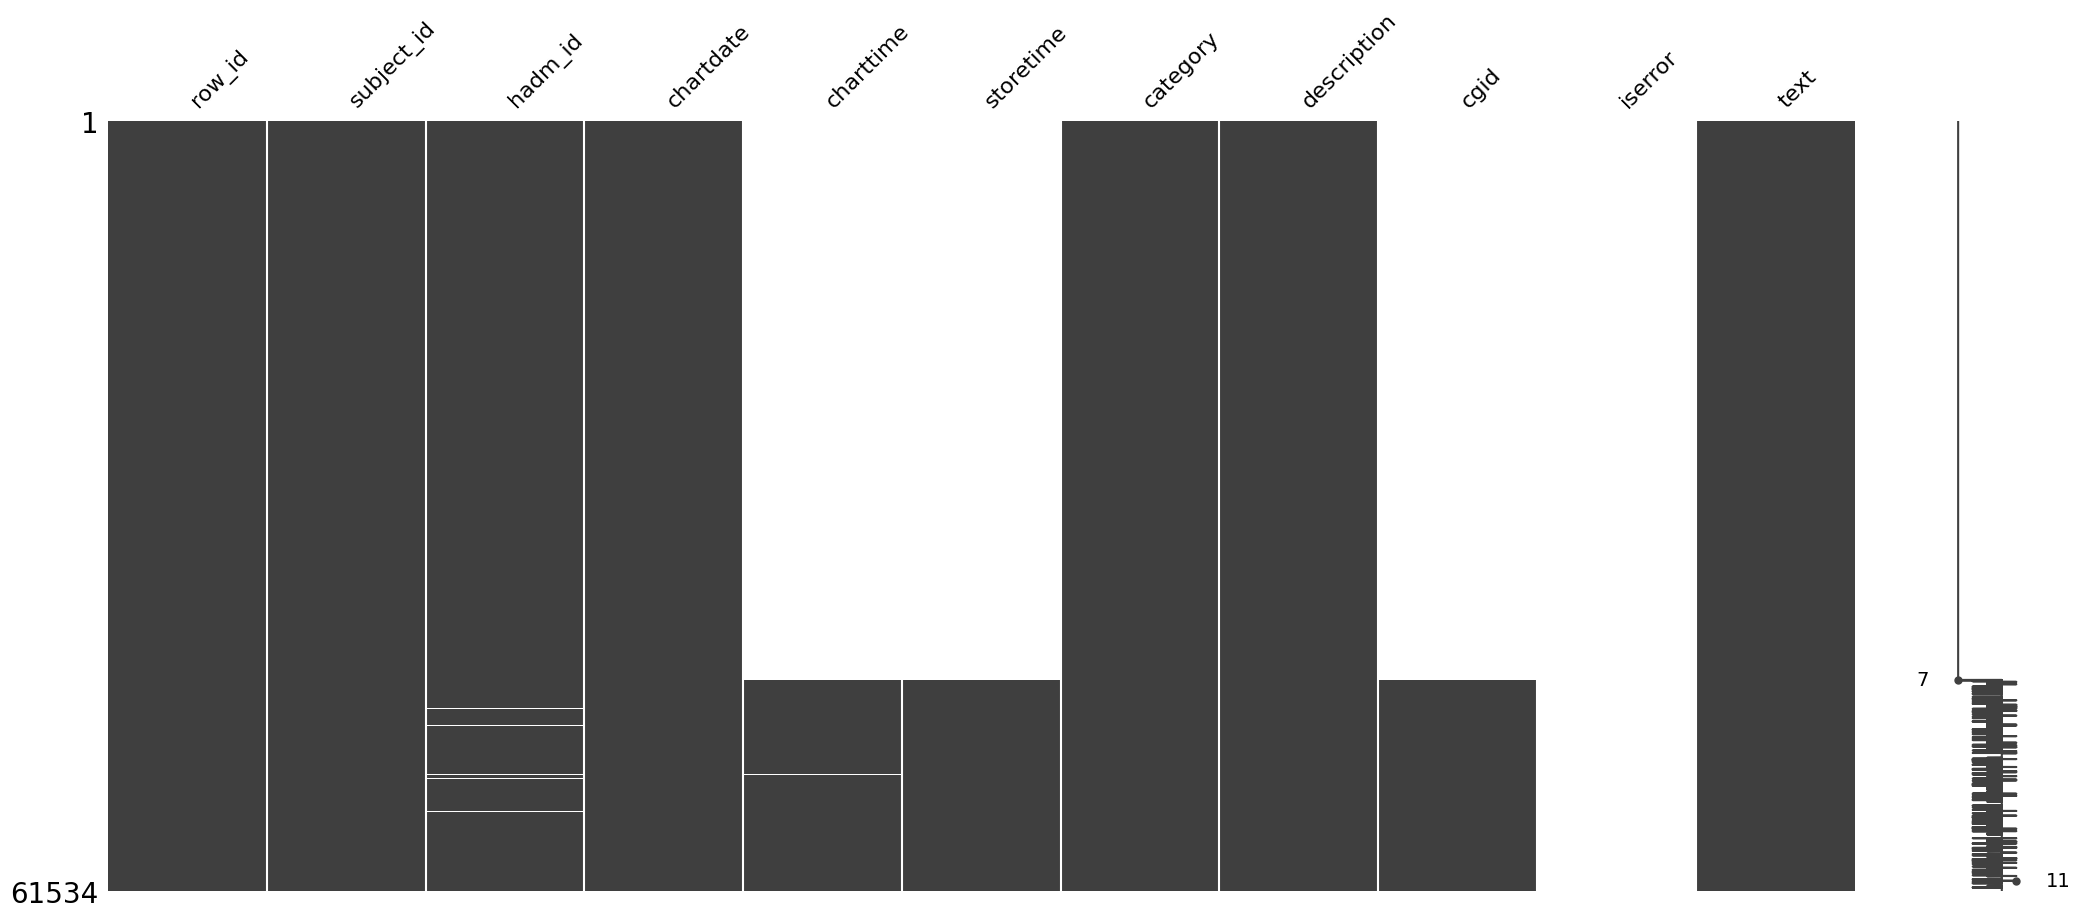

In [29]:
msno.matrix(df);

In [30]:
df.isnull().sum()
#looking at how many null/blank properties are in each col

row_id             0
subject_id         0
hadm_id          689
chartdate          0
charttime      44809
storetime      44682
category           0
description        0
cgid           44682
iserror        61480
text               0
dtype: int64

In [31]:
df[df.isnull().any(axis=1)]

,row_id,subject_id,hadm_id,chartdate,charttime,storetime,category,description,cgid,iserror,text
0,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
2,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
3,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
4,179,53181,170490.0,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] D...
...,...,...,...,...,...,...,...,...,...,...,...
61529,587658,69380,124616.0,2189-07-16,2189-07-16 20:30:00,2189-07-16 22:52:55,Physician,Physician Resident Admission Note,21375.0,NaN,"Chief Complaint: Shortness of breath, increas..."
61530,632634,53464,137299.0,2173-03-31,2173-03-31 07:58:00,2173-03-31 07:58:50,Physician,Physician Resident Admission Note,15146.0,NaN,TITLE:\n Chief Complaint: GI bleed\n HPI:...
61531,661393,97927,164455.0,2130-02-07,2130-02-07 11:33:00,2130-02-07 11:51:38,Physician,Physician Resident Admission Note,20732.0,NaN,Chief Complaint: severe sepsis\n HPI:\n H...
61532,661403,60106,136013.0,2145-02-02,2145-02-02 13:29:00,2145-02-02 13:29:52,Physician,Physician Resident Admission Note,19862.0,NaN,Chief Complaint: Trach Bleed\n HPI:\n Bri...


In [33]:
df.dropna()

,row_id,subject_id,hadm_id,chartdate,charttime,storetime,category,description,cgid,iserror,text
44821,318078,27370,101266.0,2125-02-01,2125-02-01 16:30:00,2125-02-01 19:55:08,Physician,Physician Attending Admission Note,18917.0,1.0,"Chief Complaint: abd pain and hematuria , t..."
45010,315222,18082,181163.0,2156-03-02,2156-03-01 19:22:00,2156-03-02 15:17:42,Physician,Physician Attending Admission Note,15815.0,1.0,Chief Complaint:\n HPI:\n Allergies:\n S...
46294,337341,31563,159549.0,2138-09-22,2138-09-22 02:57:00,2138-09-22 08:38:09,Physician,Physician Resident Admission Note,18666.0,1.0,Chief Complaint: Hematochezia\n HPI:\n Th...
46652,335864,8498,153637.0,2144-09-21,2144-09-21 23:36:00,2144-09-21 23:59:12,Physician,Physician Resident Admission Note,20952.0,1.0,Chief Complaint: VF arrest\n <I>MICU admit ...
46680,343716,16076,165149.0,2180-10-31,2180-10-31 14:51:00,2180-10-31 18:03:48,Physician,Physician Resident Admission Note,19692.0,1.0,Chief Complaint: Hypotension/Nausea\n HPI:\...
46790,344768,6024,106374.0,2127-09-29,2127-09-29 06:41:00,2127-09-29 07:33:21,Physician,Physician Resident Admission Note,17863.0,1.0,Chief Complaint:\n HPI:\n Allergies:\n P...
46804,344880,6901,198044.0,2133-08-31,2133-08-31 06:44:00,2133-08-31 21:26:00,Physician,Physician Resident Admission Note,17863.0,1.0,Chief Complaint:\n HPI:\n Allergies:\n N...
46900,356887,13422,131721.0,2154-11-10,2154-11-10 07:54:00,2154-11-10 09:04:17,Physician,Physician Resident Admission Note,18900.0,1.0,Chief Complaint:\n HPI:\n Allergies:\n N...
46923,341208,27463,185823.0,2119-10-24,2119-10-23 19:32:00,2119-10-24 13:08:01,Physician,Physician Resident Admission Note,20912.0,1.0,Chief Complaint: Alcohol Withdrawal\n HPI:\...
47110,357389,27427,175448.0,2150-12-08,2150-12-08 20:35:00,2150-12-08 20:37:45,Physician,Physician Resident Admission Note,15052.0,1.0,"Chief Complaint: unresponsive, hypotension, h..."


In [34]:
df.dropna(axis=1)

,row_id,subject_id,chartdate,category,description,text
0,175,13702,2118-06-14,Discharge summary,Report,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,2119-05-25,Discharge summary,Report,Admission Date: [**2119-5-4**] D...
2,177,13702,2124-08-18,Discharge summary,Report,Admission Date: [**2124-7-21**] ...
3,178,26880,2162-03-25,Discharge summary,Report,Admission Date: [**2162-3-3**] D...
4,179,53181,2172-03-08,Discharge summary,Report,Admission Date: [**2172-3-5**] D...
...,...,...,...,...,...,...
61529,587658,69380,2189-07-16,Physician,Physician Resident Admission Note,"Chief Complaint: Shortness of breath, increas..."
61530,632634,53464,2173-03-31,Physician,Physician Resident Admission Note,TITLE:\n Chief Complaint: GI bleed\n HPI:...
61531,661393,97927,2130-02-07,Physician,Physician Resident Admission Note,Chief Complaint: severe sepsis\n HPI:\n H...
61532,661403,60106,2145-02-02,Physician,Physician Resident Admission Note,Chief Complaint: Trach Bleed\n HPI:\n Bri...


In [42]:
df.shape

(61534, 11)